# Case Study: Twitter - Circular Economy

## Goals: Extracting topics, extracting relevant hashtags and keywords.

### Key Steps:
1. Splitting the dataset into training and test sets (75% - 25%)
2. Dataset cleaning
3. Corpus cleaning
4. Creating Term-Document Matrices (TDM) and Document-Term Matrices (DTM)
5. Identifying the most frequent terms
6. Word associations
7. Bigrams and trigrams
8. General sentiment analysis
9. Topic identification
10. Sentiment analysis relative to topics
11. Tweet classification based on topics
12. Extraction of the most frequent hashtags


### Libraries

In [1]:
suppressWarnings(suppressMessages(
  invisible({
library(tm)
library(topicmodels)
library(qdapTools)
library(BTM)
# library(qdap)
library(ggraph)
library(textplot)
library(concaveman)
library(data.table)
library(stopwords)
library(udpipe)
library(syuzhet)
library(ggthemes)
library(ggplot2)
library(RColorBrewer)
library(wordcloud)
library(dplyr)
library(tidytext)
library(quanteda)
library(stringr)
library(purrr)
  })
))

### 1 - Splitting the dataset into training and test sets (75% - 25%)

In [2]:
# Importing the .csv file
twitter <- read.csv("./CE.csv", stringsAsFactors = FALSE)
names(twitter)
twitter <- unique(twitter) # Removing duplicate tweets

# 75% - 25% (training - testing)
training <- floor(0.75 * nrow(twitter))

# Setting the seed for reproducibility
set.seed(100)

# Creating training and test datasets
index <- sample(seq_len(nrow(twitter)), size = training)
test_twitter <- twitter[-index, ]
training_twitter <- twitter[index, ]
options(max.print=100) # Setting max.print option

[1] "text"       "created"    "screenName"

### 2 - Dataset cleaning

In [3]:
# Cleaning the dataset (removing encoding errors)
test_twitter$text <- gsub("<[^>]+>", "", test_twitter$text)
test_twitter$text <- gsub("<[^>]+><[^>]+>", "", test_twitter$text)
test_twitter$text <- gsub("&amp;", "", test_twitter$text)
test_twitter$text <- gsub("&amp", "", test_twitter$text)
test_twitter$text <- gsub("&", "", test_twitter$text)
test_twitter$text <- gsub("amp", "", test_twitter$text)
test_twitter$text <- gsub("amp;", "", test_twitter$text)
test_twitter$text <- gsub("@[A-Za-z0-9]+", "", test_twitter$text)
test_twitter$text <- gsub("wh", "", test_twitter$text)
test_twitter$text <- gsub("@SchneiderElec", "", test_twitter$text)
test_twitter$text <- gsub("@", "", test_twitter$text)
test_twitter$text <- gsub("SchneiderElec", "", test_twitter$text)
test_twitter$text <- gsub("tweet", "", test_twitter$text)
test_twitter$text <- gsub("tweeted", "", test_twitter$text)
test_twitter$text <- gsub("tweets", "", test_twitter$text)
test_twitter$text <- gsub("1st", "", test_twitter$text)
test_twitter$text <- gsub("anandmahindra", "", test_twitter$text)

### 3 - Corpus cleaning


In [4]:
# Cleaning the corpus
twitter_get <- get_sentences(test_twitter$text)
corpus_review = Corpus(VectorSource(twitter_get)) # Creating the corpus
corpus_review = tm_map(corpus_review, tolower) # Converting text to lowercase
corpus_review = tm_map(corpus_review, removePunctuation) # Removing punctuation
corpus_review = tm_map(corpus_review, removeNumbers) # Removing numbers
# stopwords("en") # English stopwords list
corpus_review = tm_map(corpus_review, removeWords, stopwords("english")) # Removing stopwords
my_stopwords <- c("may", "will", "also", "get", "made", "can", 
                  "am", "just", "i", "i'm", "of", "the", "this", 
                  "in", "know", "eriksolheim", "want", "need", 
                  "che", "amp", "check", "just", "read", "circulareconomy", 
                  "circ", "one", "&amp;", "&", ";", "&amp", "wh", "1st")
corpus_review = tm_map(corpus_review, removeWords, my_stopwords) # Removing highly frequent words

# Removing URLs at the end of each tweet
removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
corpus_review <- tm_map(corpus_review, removeURL)
corpus_review <- tm_map(corpus_review, content_transformer(removeURL))

Warning message in tm_map.SimpleCorpus(corpus_review, tolower):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removeWords, my_stopwords):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, removeURL):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_review, content_transformer(removeURL)):
"transformation drops documents"


### 4 - Creating Term-Document Matrices (TDM) and Document-Term Matrices (DTM)

In [5]:
suppressWarnings(suppressMessages(
  invisible({

# Creating Term-Document Matrix (TDM) and Document-Term Matrix (DTM)
review_tdm <- TermDocumentMatrix(corpus_review, control=list(wordlength=c(1,Inf), weighting = weightTfIdf))
review_dtm <- DocumentTermMatrix(corpus_review, control=list(wordlength=c(1,Inf), weighting = weightTfIdf))

# Converting TDM to a matrix
review_m <- as.matrix(review_tdm)
  })
))

### 5 - Identifying the most frequent terms


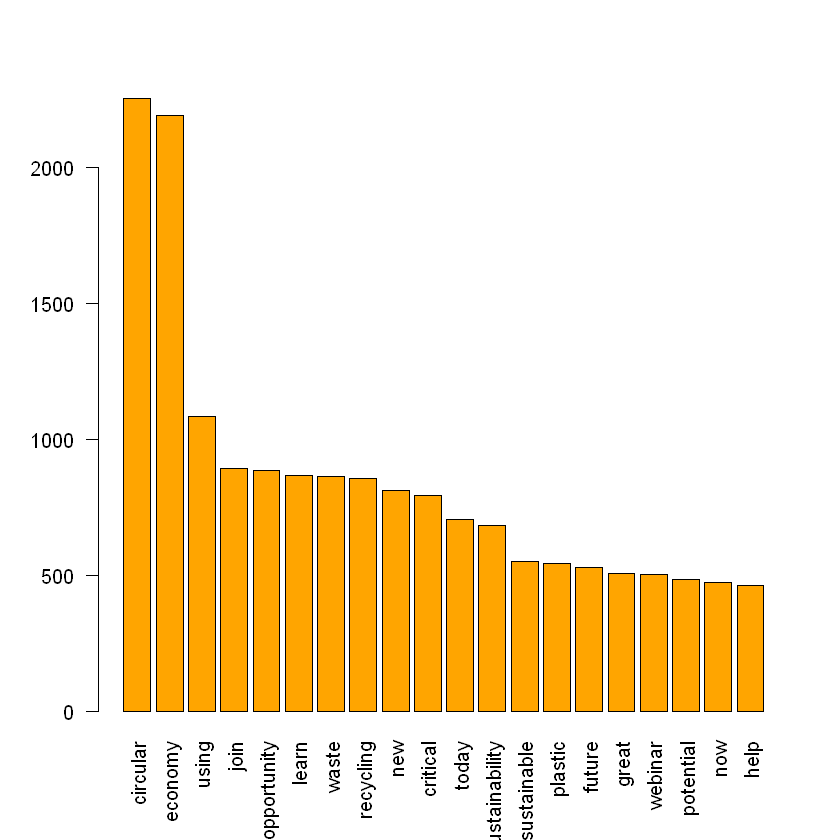

In [6]:
# Summing term frequencies to get the total frequency of each word
review_term_freq <- rowSums(review_m)
# Sorting term frequencies in descending order
review_term_freq <- sort(review_term_freq, decreasing = TRUE)
# List of the top 20 most frequent terms
# review_term_freq[1:20]
# Barplot of the top 20 most frequent terms
barplot(review_term_freq[1:20], col = "orange", las=2)

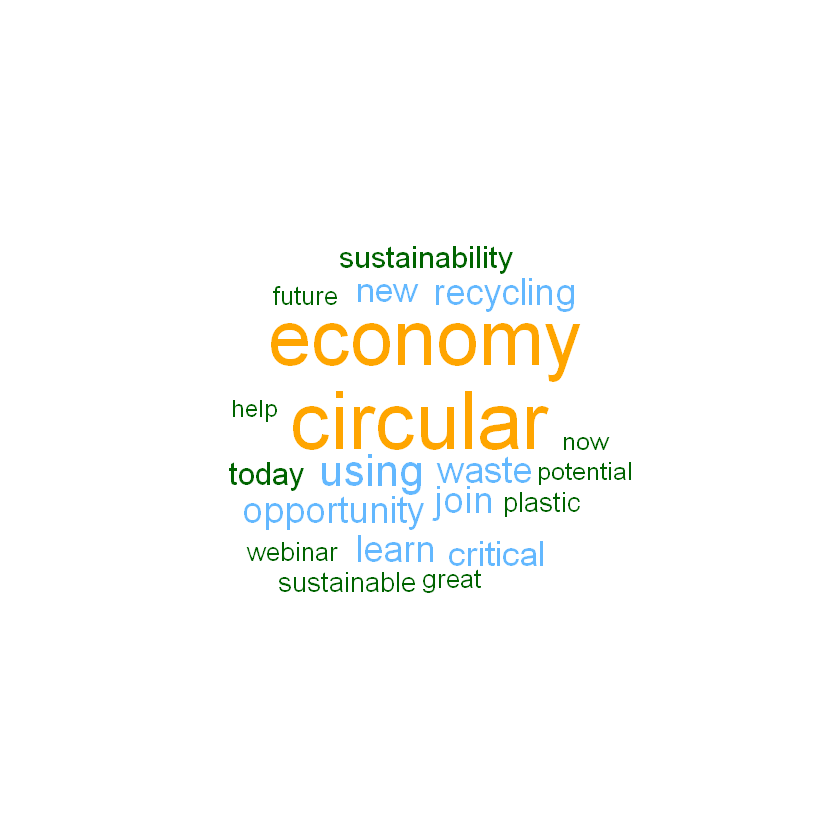

In [7]:
# Wordcloud with the top 20 most frequent terms
review_word_freq <- data.frame(term = names(review_term_freq), num = review_term_freq)
wordcloud(review_word_freq$term, review_word_freq$num, max.words = 20, random.order = FALSE, colors = c("darkgreen","steelblue1","orange"))
# review_word_freq$term
# review_word_freq$num

### 6 - Word associations

$plastic
pollution     ocean  continue      fish     gothe   convert      noon highvalue 
     0.44      0.21      0.20      0.17      0.13      0.11      0.11      0.11 
catalysis 
     0.11

$today
         consumed earthovershootday        regenerate               far 
             0.36              0.35              0.34              0.31 
            earth              year   worldcleanupday               iss 
             0.31              0.26              0.19              0.18 
        essential        homeowners            talked               btc 
             0.17              0.17              0.15              0.12 
           starts 
             0.10

$recycling
 potential       road opportunit     always       high   chemical    economy 
      0.52       0.42       0.17       0.13       0.13       0.12       0.11

$waste
       zero    obtained    landfill       label    startups         age 
       0.29        0.27        0.25        0.25        0.17        0.15 
       food   modelling     problem  management       subje   designers 
       0.14        0.14        0.13        0.13        0.13        0.12 
       five      export     options       sites       banne legislating 
       0.11        0.11        0.11        0.11        0.11        0.11 
      novel 
       0.10

$sustainable
 profitability          fries      delicious       footwear         trucks 
          0.18           0.16           0.16           0.16           0.15 
         caign       delivers           graf        pipelin          heidi 
          0.15           0.15           0.15           0.15           0.14 
      bradford           path  unprecedented economyneither         impact 
          0.14           0.13           0.13           0.13           0.12 
    supporting           fuel 
          0.12           0.11

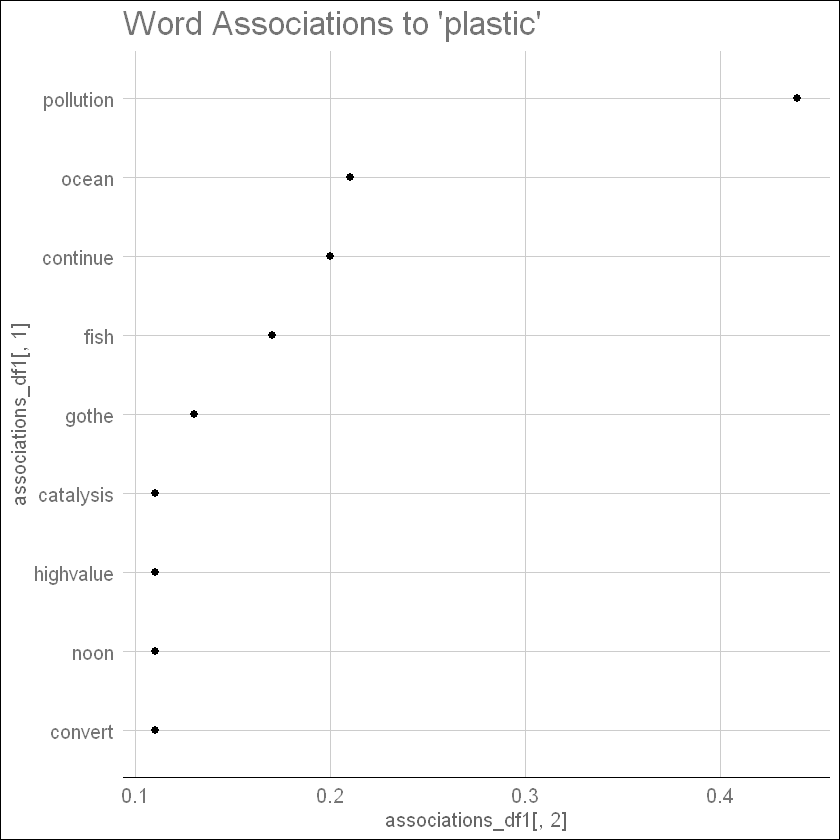

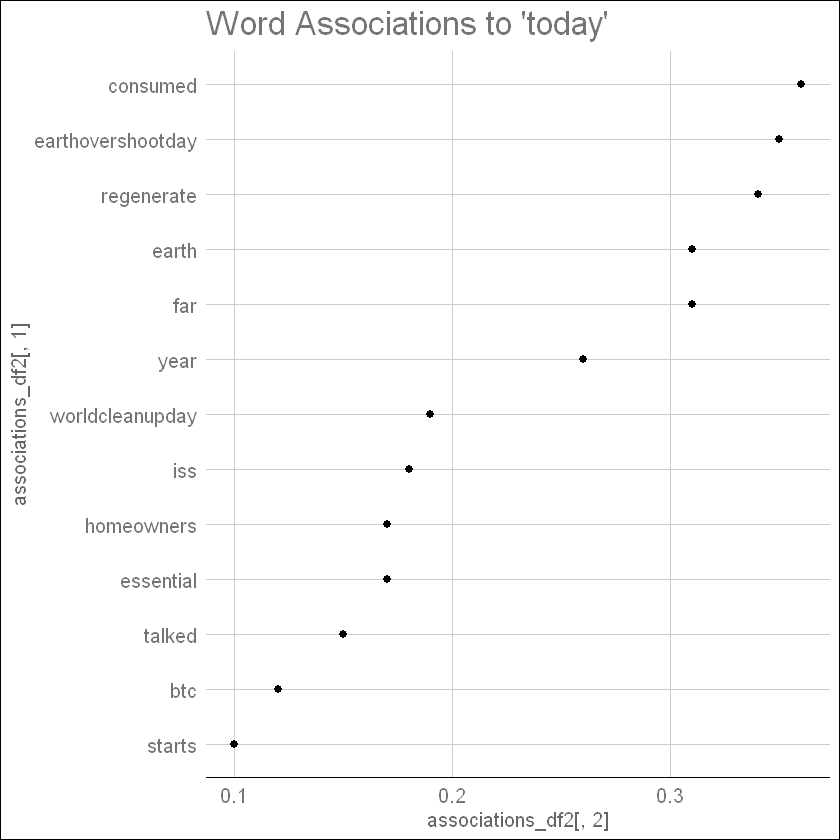

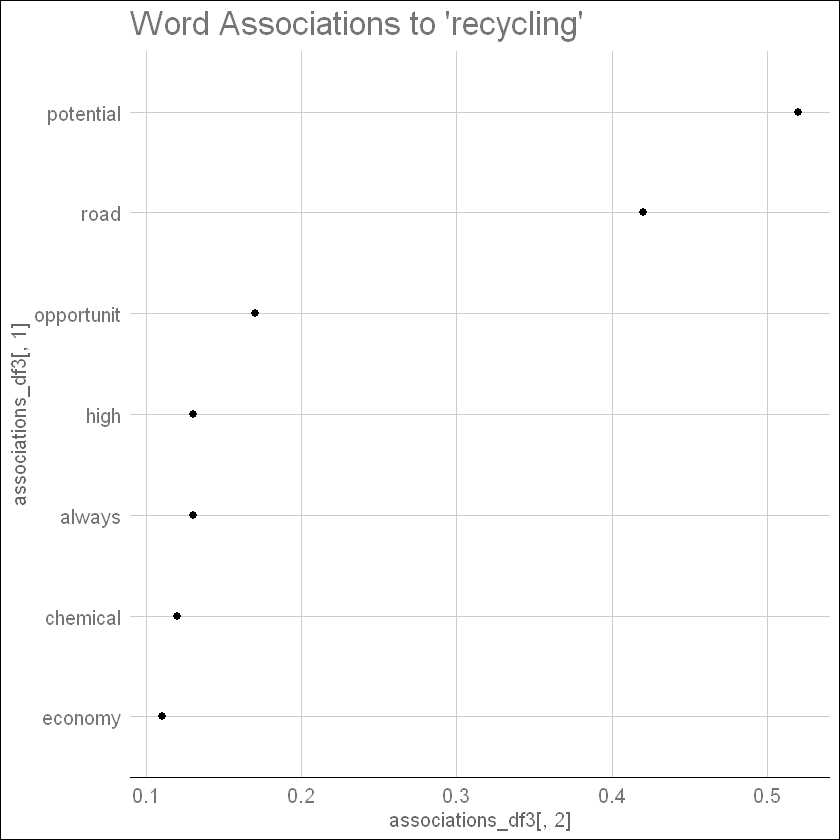

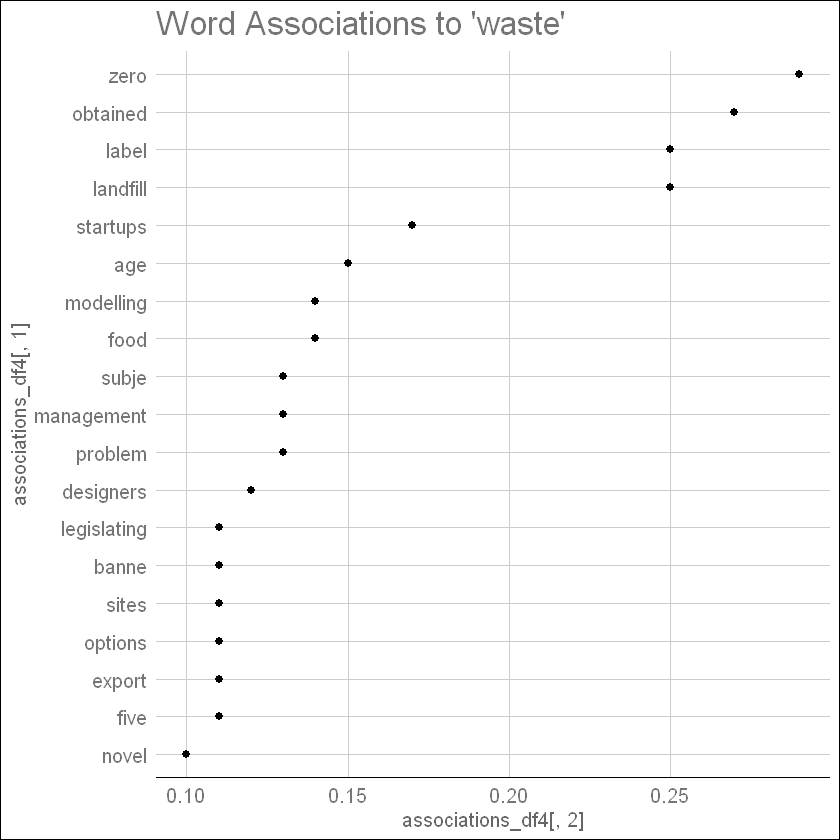

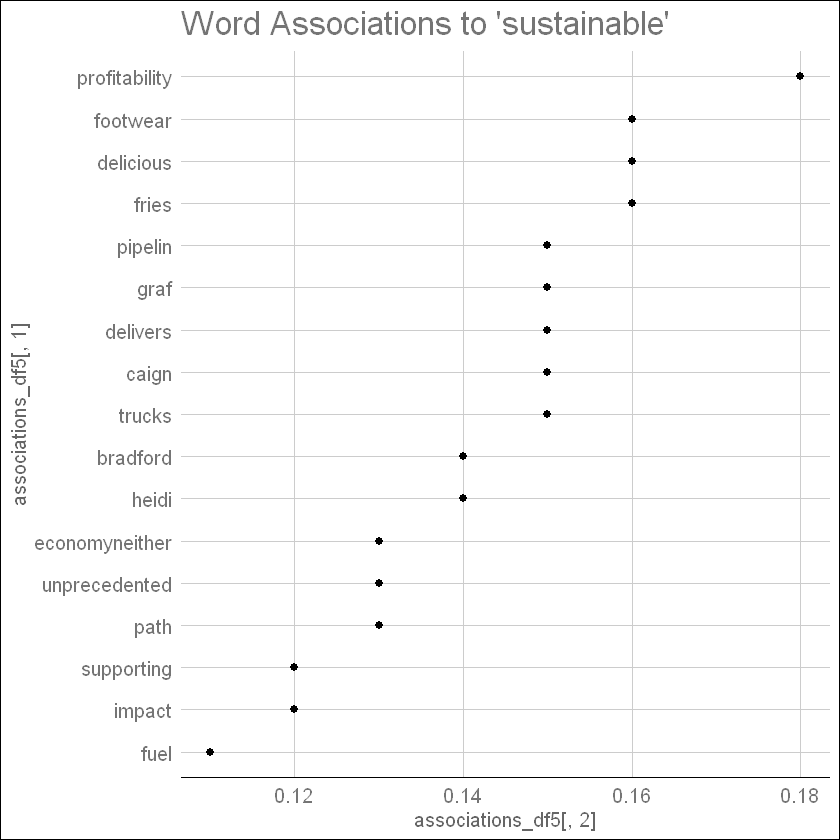

In [8]:
# Word associations
assocs_1 = findAssocs(review_dtm, terms = "plastic", 0.1)
assocs_1
assocs_2 = findAssocs(review_dtm, terms = "today", 0.1)
assocs_2
assocs_3 = findAssocs(review_dtm, terms = "recycling", 0.1)
assocs_3
assocs_4 = findAssocs(review_dtm, terms = "waste", 0.1)
assocs_4
assocs_5 = findAssocs(review_dtm, terms = "sustainable", 0.1)
assocs_5

associations_df1 = list_vect2df(assocs_1)[, 2:3]
ggplot(associations_df1, aes(y = associations_df1[, 1])) + geom_point(aes(x = associations_df1[, 2]), data = associations_df1, size = 2) + ggtitle("Word Associations to 'plastic'") + theme_gdocs()

associations_df2 = list_vect2df(assocs_2)[, 2:3]
ggplot(associations_df2, aes(y = associations_df2[, 1])) + geom_point(aes(x = associations_df2[, 2]), data = associations_df2, size = 2) + ggtitle("Word Associations to 'today'") + theme_gdocs()

associations_df3 = list_vect2df(assocs_3)[, 2:3]
ggplot(associations_df1, aes(y = associations_df3[, 1])) + geom_point(aes(x = associations_df3[, 2]), data = associations_df3, size = 2) + ggtitle("Word Associations to 'recycling'") + theme_gdocs()

associations_df4 = list_vect2df(assocs_4)[, 2:3]
ggplot(associations_df4, aes(y = associations_df4[, 1])) + geom_point(aes(x = associations_df4[, 2]), data = associations_df4, size = 2) + ggtitle("Word Associations to 'waste'") + theme_gdocs()

associations_df5 = list_vect2df(assocs_5)[, 2:3]
ggplot(associations_df5, aes(y = associations_df5[, 1])) + geom_point(aes(x = associations_df5[, 2]), data = associations_df5, size = 2) + ggtitle("Word Associations to 'sustainable'") + theme_gdocs()


### 7 - Bigrams and trigrams

In [9]:
# Creating bigrams
review_bigram = tokens(test_twitter$text) %>%
  tokens_remove("\\p{P}", valuetype = "regex", padding = TRUE) %>%
  tokens_remove(stopwords("english"), padding  = TRUE) %>%
  tokens_ngrams(n = 2) %>%
  dfm()
topfeatures(review_bigram)

# Creating trigrams
review_trigram = tokens(test_twitter$text) %>%
  tokens_remove("\\p{P}", valuetype = "regex", padding = TRUE) %>%
  tokens_remove(stopwords("english"), padding  = TRUE) %>%
  tokens_ngrams(n = 3) %>%
  dfm()
topfeatures(review_trigram)

circular_economy natural_resources  helped_customers   customers_avoid 
             7333               379               362               362 
      avoid_using         earth_can    can_regenerate           join_us 
              362               257               257               255 
    critical_need        zero_waste 
              231               164

helped_customers_avoid      customers_avoid_using 
                       362                        362 
      earth_can_regenerate          advanced_pig_farm 
                       257                        141 
   circular_carbon_economy       new_circular_economy 
                       136                        120 
      see_govt_legislating     circular_economy_forum 
                        88                         79 
ellen_macarthur_foundation     world_circular_economy 
                        72                         70

### 8 - General sentiment analysis

In [10]:
# General sentiment analysis using the syuzhet package
sentiment_Syuzhet = get_sentiment(test_twitter$text)
sum_sentiment = sum(sentiment_Syuzhet)
cat("sentiment sum:", sum_sentiment, "\n")

sentiment sum: 12617.3 


In [11]:
sentiment_nrc = get_nrc_sentiment(test_twitter$text)
sentiment_nrc


anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,2,0,2
0,0,0,0,0,0,0,1,0,1
0,0,0,0,0,0,0,0,0,0
0,2,0,0,1,0,1,1,0,3
0,0,0,0,0,0,0,1,0,0
0,1,0,0,0,0,0,1,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,2,0,0


In [12]:
colSums(sentiment_nrc)

anger anticipation      disgust         fear          joy      sadness 
        1524         6712         2843         2719         5620         1677 
    surprise        trust     negative     positive 
        2009        17875         5883        18805

In [13]:
anger = sum(sentiment_nrc[,1])
# anger
anticipation = sum(sentiment_nrc[,2])
# anticipation    
disgust = sum(sentiment_nrc[,3])
# disgust
fear = sum(sentiment_nrc[,4])
# fear
joy = sum(sentiment_nrc[,5])
# joy
sadness = sum(sentiment_nrc[,6])
# sadness
surprise = sum(sentiment_nrc[,7])
# surprise
trust = sum(sentiment_nrc[,8])
# trust
negative = sum(sentiment_nrc[,9]) 
# negative
positive = sum(sentiment_nrc[,10]) 
# positive

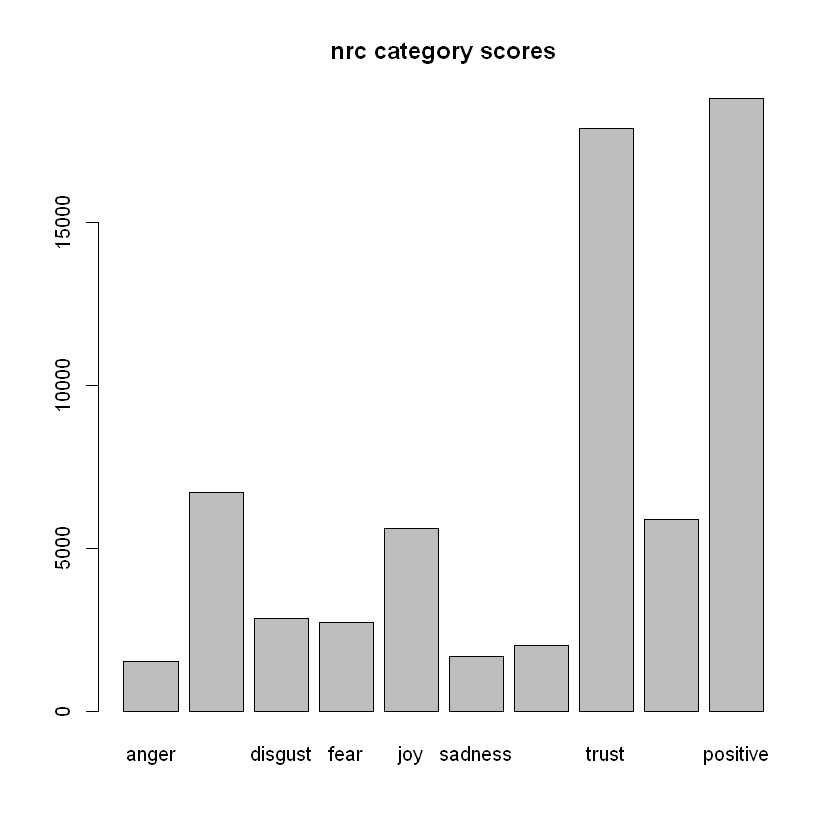

In [14]:
# Barplot showing sentiment scores for each category in sentiment_nrc
sentiment_nrc1 = c(anger, anticipation, disgust, fear, joy, sadness, surprise, trust, negative, positive)

barplot(sentiment_nrc1, main = "nrc category scores", col = "grey", names.arg = c("anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust", "negative", "positive"))

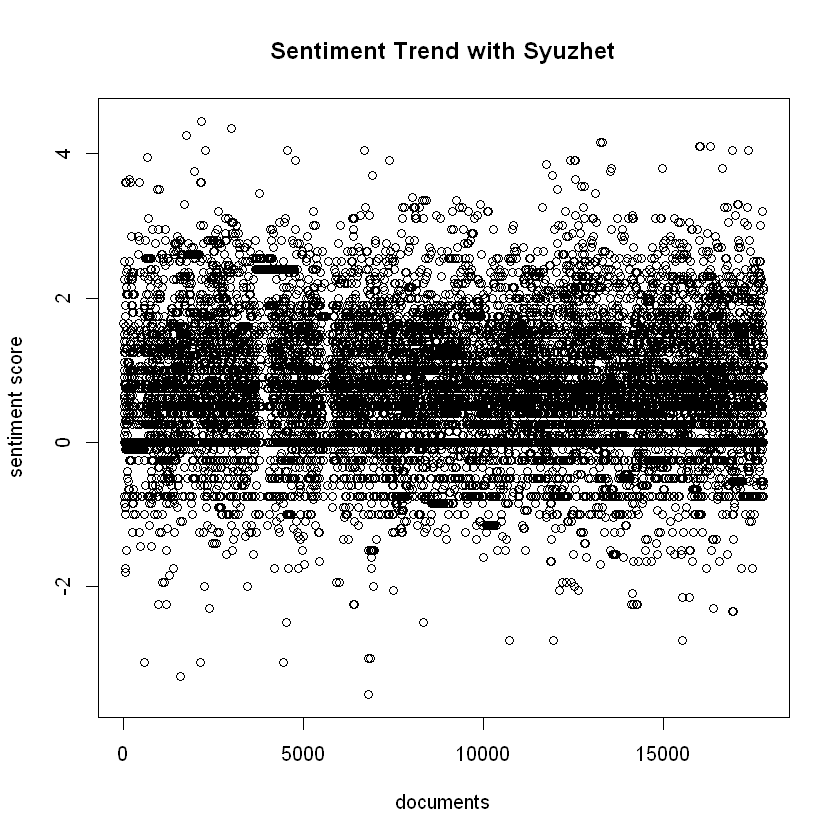

In [15]:
plot(sentiment_Syuzhet, main = "Sentiment Trend with Syuzhet", xlab = "documents", ylab = "sentiment score")

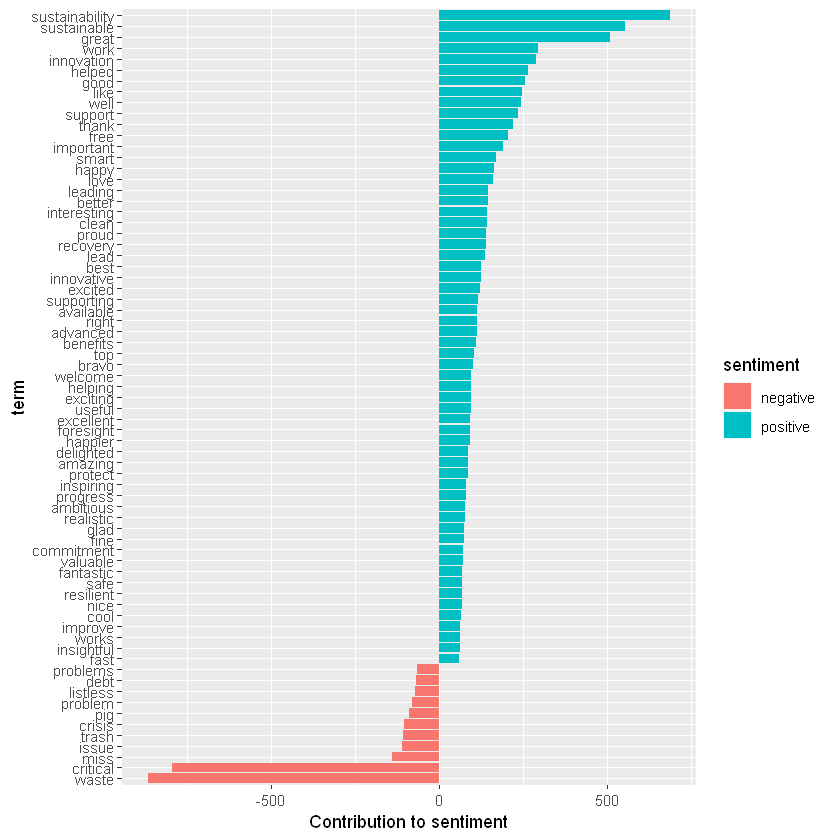

In [16]:
# Plot showing the contribution of words to overall sentiment
ap_td = tidy(review_dtm)
ap_sentiments <- ap_td %>%
  inner_join(get_sentiments("bing"), by = c(term = "word")) 
ap_sentiments %>%
  count(sentiment, term, wt = count) %>%
  ungroup() %>%
  filter(n >= 60) %>%
  mutate(n = ifelse(sentiment == "negative", -n, n)) %>%
  mutate(term = reorder(term, n)) %>%
  ggplot(aes(term, n, fill = sentiment)) +
  geom_bar(stat = "identity") +
  ylab("Contribution to sentiment") +
  coord_flip()

### 9 - Topic identification

In [ ]:
suppressWarnings(suppressMessages(
  invisible({
# Topic modeling
topic_ <- udpipe(test_twitter$text, "english", trace = 10)
biterms <- as.data.table(topic_)
biterms <- biterms[, cooccurrence(x = lemma,
                                  relevant = upos %in% c("NOUN", "ADJ", "VERB") & 
                                    nchar(lemma) > 2 & !lemma %in% stopwords("en"),
                                  skipgram = 3),
                   by = list(doc_id)]
traindata <- subset(topic_, upos %in% c("NOUN", "ADJ", "VERB") & !lemma %in% stopwords("en") & nchar(lemma) > 2)
traindata <- traindata[, c("doc_id", "lemma")]

# Perform Gibbs sampling and suppress output
model <- BTM(traindata, biterms = biterms, k = 5, iter = 2000, background = TRUE, trace = 100)
  })
))



,token,probability
,<chr>,<dbl>
1,circular,0.052526758
2,economy,0.043233383
3,new,0.009361956
4,waste,0.009228906
5,Economy,0.008821690
,token,probability
,<chr>,<dbl>
1,circular,0.20894045
2,economy,0.17432138


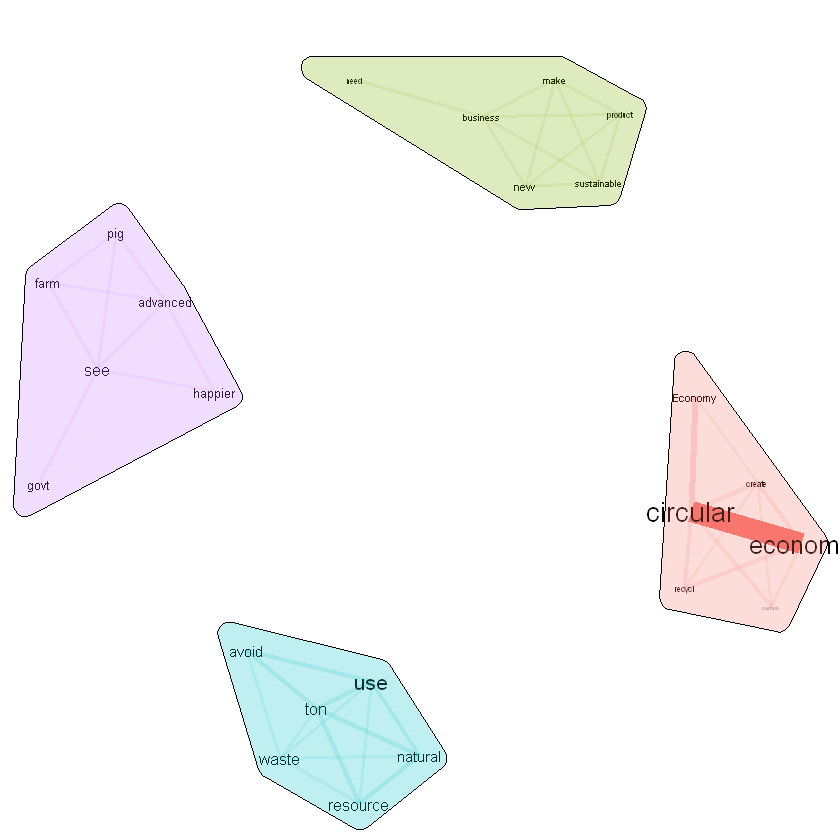

In [18]:
# Get terms and plot the model
terms(model)
plot(model, top_n = 6, title = "")

### 10 - Sentiment analysis relative to topics

In [19]:
# Sentiment by topic:

# Sentiment for the "circular economy" topic
token1_1 <- grep("economy", test_twitter$text)
token1_2 <- grep("circular", test_twitter$text)
token1_3 <- grep("business", test_twitter$text)
token1_4 <- grep("new", test_twitter$text) 
token1_5 <- grep("create", test_twitter$text)
token1 <- c(token1_1,token1_2,token1_3,token1_4,token1_5)
invisible(unique(token1))
senttoken1 <- get_sentiment(test_twitter$text[unique(token1)])
# senttoken1
sum(senttoken1)


# Sentiment for the "sustainability" topic
token2_1 <- grep("make", test_twitter$text) 
token2_2 <- grep("waste", test_twitter$text)
token2_3 <- grep("plastic", test_twitter$text) 
token2_4 <- grep("food", test_twitter$text) 
token2_5 <- grep("use", test_twitter$text) 
token2 <- c(token2_1,token2_2,token2_3,token2_4,token2_5)
invisible(unique(token2))
senttoken2 <- get_sentiment(test_twitter$text[unique(token2)])
sum(senttoken2)

# Sentiment for the "recycling" topic
token3_1 <- grep("plastic", test_twitter$text) 
token3_2 <- grep("recycle", test_twitter$text)
token3_3 <- grep("waste", test_twitter$text) 
token3_4 <- grep("ton", test_twitter$text) 
token3_5 <- grep("sustainable", test_twitter$text) 
token3 <- c(token3_1,token3_2,token3_3,token3_4,token3_5)
invisible(unique(token3))
senttoken3 <- get_sentiment(test_twitter$text[unique(token3)])
sum(senttoken3)

# Sentiment for the "environmental resources" topic
token4_1 <- grep("use", test_twitter$text) 
token4_2 <- grep("ton", test_twitter$text)
token4_3 <- grep("resource", test_twitter$text) 
token4_4 <- grep("natural", test_twitter$text) 
token4_5 <- grep("avoid", test_twitter$text) 
token4 <- c(token4_1,token4_2,token4_3,token4_4,token4_5)
invisible(unique(token4))
senttoken4 <- get_sentiment(test_twitter$text[unique(token4)])
sum(senttoken4)

# Sentiment for the "webinar" topic
token5_1 <- grep("today", test_twitter$text)
token5_2 <- grep("new", test_twitter$text)
token5_3 <- grep("join", test_twitter$text)
token5_4 <- grep("event", test_twitter$text)
token5_5 <- grep("webinar", test_twitter$text)
token5 <- c(token5_1,token5_2,token5_3,token5_4,token5_5)
invisible(unique(token5))
senttoken5 <- get_sentiment(test_twitter$text[unique(token5)])
sum(senttoken5)


[1] 6399.6

[1] 1532.5

[1] 2653.05

[1] 1910.25

[1] 2927.4

In [20]:
# Classifying tweets based on identified topics
options(max.print=100)
invisible(test_twitter$text[unique(token1)])
invisible(test_twitter$text[unique(token2)])
invisible(test_twitter$text[unique(token3)])
invisible(test_twitter$text[unique(token4)])
invisible(test_twitter$text[unique(token5)])

### 12 - Extraction of the most frequent hashtags

In [21]:
# Extracting hashtags
funzione_hashtag <- str_extract_all(test_twitter$text, "(?<=^|\\s)#\\S+")
hash <- (funzione_hashtag)
hashtag <- unique(hash)
# funzione_hashtag
h <- invisible(compact(hashtag)) # Removing empty tweets (those without hashtags)


In [22]:
# Most relevant hashtags
h_singoli <- c(unlist(h)) # Putting each hashtag on a separate line
corpus_hashtag = Corpus(VectorSource(h_singoli)) # Creating a corpus
corpus_hashtag = tm_map(corpus_hashtag, tolower) # Converting text to lowercase (including #)
corpus_hashtag = tm_map(corpus_hashtag, removePunctuation) # Removing punctuation
corpus_hashtag = tm_map(corpus_hashtag, removeNumbers) # Removing numbers
corpus_hashtag = tm_map(corpus_hashtag, removeWords, stopwords("english")) # Removing stopwords

my_stopwords <- c("may", "will", "also", "get", "made", "can", 
                  "am", "just", "i", "i'm", "ucu", "ucue",
                  "of", "the", "this", "in", "know",
                  "want", "need", "che", "amp", "check",  
                  "read", "circ", "one", "eriksolheim", "just",
                  "&amp;", "&", ";", "&amp", "wh", "1st", 
                  "circulareconomy", "circular", "economy")

corpus_hashtag <- tm_map(corpus_hashtag, removeWords, my_stopwords) # Removing highly frequent words
review_hashtag <- TermDocumentMatrix(corpus_hashtag, control=list(wordlength=c(1,Inf), weighting = weightTfIdf))

Warning message in tm_map.SimpleCorpus(corpus_hashtag, tolower):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus_hashtag, removeWords, my_stopwords):
"transformation drops documents"
Warning message in TermDocumentMatrix.SimpleCorpus(corpus_hashtag, control = list(wordlength = c(1, :
"custom functions are ignored"
Warning message in weighting(x):
"empty document(s): 3 9 10 16 18 21 22 24 32 33 37 42 45 47 56 61 68 82 95 102 104 105 107 108 112 117 120 125 129 131 142 144 156 159 164 170 174 176 183 187 192 197 204 214 216 220 224 225 226 233 234 244 251 271 273 274 278 280 287 295 300 310 314 322 327 329 345 354 373 380 383 3

In [23]:
# Converting TDM to a matrix
invisible(matrice_hashtag <- as.matrix(review_hashtag))
# Summing term frequencies to get the total frequency of each word
invisible(lista_hashtag <- rowSums(matrice_hashtag))
# Sorting term frequencies in descending order
invisible(lista_hashtag <- sort(lista_hashtag, decreasing = TRUE))

In [24]:
# List of the top 20 most frequent hashtags
lista_hashtag[1:20]

sustainability          recycling        sustainable              waste 
          382.9800           317.0103           239.9173           234.4844 
             covid         wcefonline         innovation        environment 
          223.4900           183.5052           183.5052           177.5784 
       circularity            webinar           plastics      climatechange 
          153.2427           153.2427           153.2427           153.2427 
           plastic        eugreendeal wastereductionweek              reuse 
          140.6545           121.1576           121.1576           114.4739 
         zerowaste          packaging        supplychain            climate 
          114.4739           114.4739           114.4739           107.6871

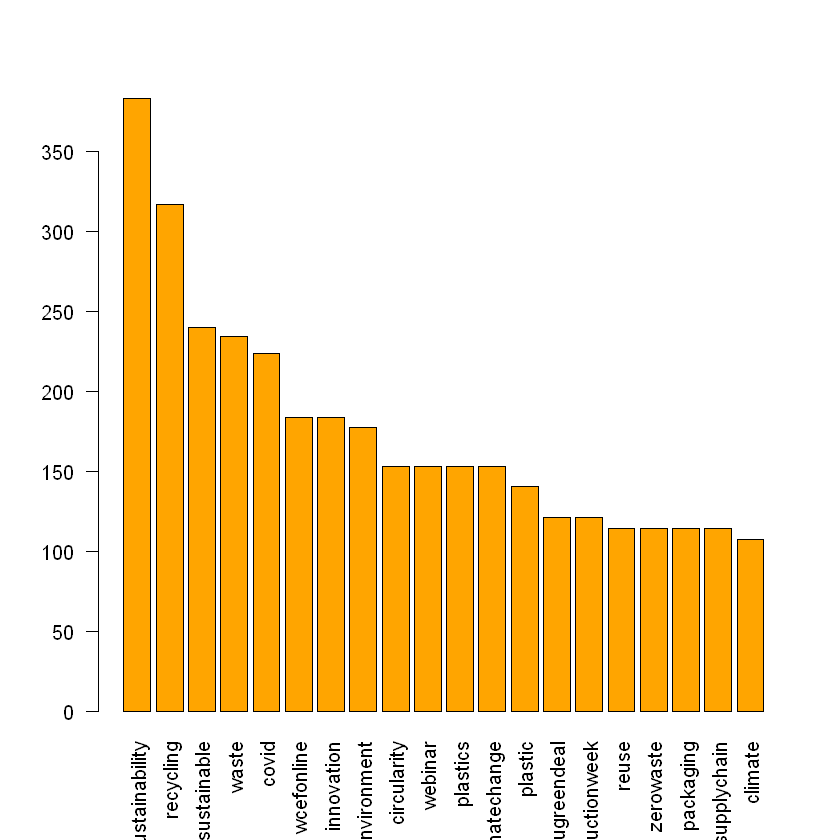

In [25]:
# Barplot of the top 20 most frequent hashtags
barplot(lista_hashtag[1:20], col = "orange", las=2)